In [135]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10000)
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from datetime import datetime
import time 

In [136]:
zri = pd.read_csv('./data/Zip_Zri_MultiFamilyResidenceRental.csv')

In [137]:
zri.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,2930.0,2952.0,2926.0,...,3484.0,3523.0,3573.0,3622.0,3664.0,3698.0,3704.0,3692.0,3715.0,3676.0
1,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,2,1447.0,1465.0,1469.0,...,1731.0,1749.0,1768.0,1787.0,1801.0,1806.0,1789.0,1761.0,1747.0,1731.0
2,61637,10023,New York,NY,New York-Newark-Jersey City,New York County,3,2797.0,2811.0,2813.0,...,3449.0,3459.0,3479.0,3491.0,3510.0,3521.0,3574.0,3608.0,3561.0,NaN
3,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,NaN,NaN,NaN,...,1226.0,1250.0,1264.0,1251.0,1246.0,1252.0,1280.0,1310.0,1294.0,1286.0
4,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,5,1437.0,1469.0,1490.0,...,1888.0,1911.0,1934.0,1950.0,1953.0,1952.0,1921.0,1958.0,NaN,1916.0


In [138]:
miami_zip=sorted(zri[zri["Metro"]=="Miami-Fort Lauderdale-West Palm Beach"].RegionName.unique().tolist())
%store miami_zip

Stored 'miami_zip' (list)


In [139]:
orlando_zip=sorted(zri[zri["Metro"]=="Orlando-Kissimmee-Sanford"].RegionName.unique().tolist())
%store orlando_zip

Stored 'orlando_zip' (list)


In [140]:
tampa_zip=sorted(zri[zri["Metro"]=="Tampa-St. Petersburg-Clearwater"].RegionName.unique().tolist())
%store tampa_zip

Stored 'tampa_zip' (list)


In [141]:
jax_zip=sorted(zri[zri["Metro"]=="Jacksonville"].RegionName.unique().tolist())
%store jax_zip

Stored 'jax_zip' (list)


In [142]:
miami_zip

[33004,
 33009,
 33010,
 33020,
 33021,
 33024,
 33025,
 33027,
 33033,
 33060,
 33062,
 33064,
 33065,
 33066,
 33068,
 33125,
 33126,
 33127,
 33130,
 33131,
 33132,
 33133,
 33134,
 33135,
 33137,
 33138,
 33139,
 33140,
 33141,
 33142,
 33143,
 33145,
 33146,
 33147,
 33150,
 33154,
 33156,
 33157,
 33160,
 33161,
 33172,
 33178,
 33179,
 33180,
 33186,
 33196,
 33301,
 33304,
 33305,
 33308,
 33311,
 33312,
 33313,
 33314,
 33315,
 33316,
 33323,
 33324,
 33334,
 33401,
 33404,
 33407,
 33413,
 33414,
 33418,
 33432,
 33433,
 33435,
 33436,
 33444,
 33445,
 33458,
 33460,
 33461,
 33483]

In [143]:
orlando_zip

[32701,
 32703,
 32714,
 32751,
 32765,
 32771,
 32792,
 32801,
 32803,
 32806,
 32807,
 32810,
 32811,
 32812,
 32817,
 32821,
 32822,
 32825,
 32826,
 32827,
 32828,
 32835,
 32837,
 32839,
 34711,
 34747,
 34787]

In [144]:
tampa_zip

[33510,
 33511,
 33578,
 33602,
 33604,
 33605,
 33606,
 33607,
 33611,
 33612,
 33613,
 33615,
 33617,
 33626,
 33634,
 33701,
 33702,
 33705,
 33706,
 33707,
 33708,
 33712,
 33716,
 33755,
 33756,
 33759,
 33764,
 33771,
 33774,
 34683,
 34684,
 34698]

In [145]:
jax_zip

[32204, 32205, 32206, 32207, 32209, 32216, 32224, 32225, 32246, 32250, 32256]

# EDA and Visualization on the Zillow Rent Index

In [146]:
df_metro_fl=zri[zri["Metro"].isin(["Miami-Fort Lauderdale-West Palm Beach",
                       "Orlando-Kissimmee-Sanford", 
                       "Tampa-St. Petersburg-Clearwater",
                      "Jacksonville"])]

In [147]:
df_metro_fl.columns.tolist()
#There're 7 columns which are not "months"

['RegionID',
 'RegionName',
 'City',
 'State',
 'Metro',
 'CountyName',
 'SizeRank',
 '2010-09',
 '2010-10',
 '2010-11',
 '2010-12',
 '2011-01',
 '2011-02',
 '2011-03',
 '2011-04',
 '2011-05',
 '2011-06',
 '2011-07',
 '2011-08',
 '2011-09',
 '2011-10',
 '2011-11',
 '2011-12',
 '2012-01',
 '2012-02',
 '2012-03',
 '2012-04',
 '2012-05',
 '2012-06',
 '2012-07',
 '2012-08',
 '2012-09',
 '2012-10',
 '2012-11',
 '2012-12',
 '2013-01',
 '2013-02',
 '2013-03',
 '2013-04',
 '2013-05',
 '2013-06',
 '2013-07',
 '2013-08',
 '2013-09',
 '2013-10',
 '2013-11',
 '2013-12',
 '2014-01',
 '2014-02',
 '2014-03',
 '2014-04',
 '2014-05',
 '2014-06',
 '2014-07',
 '2014-08',
 '2014-09',
 '2014-10',
 '2014-11',
 '2014-12',
 '2015-01',
 '2015-02',
 '2015-03',
 '2015-04',
 '2015-05',
 '2015-06',
 '2015-07',
 '2015-08',
 '2015-09',
 '2015-10',
 '2015-11',
 '2015-12',
 '2016-01',
 '2016-02',
 '2016-03',
 '2016-04',
 '2016-05',
 '2016-06',
 '2016-07',
 '2016-08',
 '2016-09',
 '2016-10',
 '2016-11',
 '2016-12',
 '2

In [148]:
df_metro_fl.shape #145 zip codes in all 4 metro areas 

(145, 120)

In [149]:
df_metro_fl

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
71,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,72,1622.0,1658.0,NaN,...,2028.0,2016.0,2016.0,2023.0,2031.0,2037.0,2021.0,2020.0,2054.0,NaN
72,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,73,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1459.0,1473.0,1487.0,1443.0,1433.0
85,72363,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,86,1106.0,1120.0,1133.0,...,1614.0,1617.0,1616.0,1618.0,1618.0,1622.0,1610.0,1629.0,1636.0,1611.0
90,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,91,1388.0,1423.0,1449.0,...,1956.0,1958.0,1976.0,1993.0,2001.0,1992.0,1996.0,1939.0,1958.0,NaN
127,72362,33024,Pembroke Pines,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,128,NaN,NaN,NaN,...,1537.0,1534.0,1537.0,1537.0,1537.0,1537.0,1527.0,1525.0,1544.0,1527.0
153,71902,32256,Jacksonville,FL,Jacksonville,Duval County,154,706.0,726.0,733.0,...,1209.0,1210.0,1214.0,1221.0,1227.0,1233.0,1247.0,1274.0,1261.0,1258.0
158,73183,34711,Clermont,FL,Orlando-Kissimmee-Sanford,Lake County,159,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1370.0,1388.0,1397.0,1407.0
160,72347,33009,Hallandale,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,161,1173.0,1190.0,1203.0,...,1660.0,1659.0,1657.0,1648.0,1637.0,1630.0,1627.0,1632.0,1613.0,1605.0
178,72247,32822,Orlando,FL,Orlando-Kissimmee-Sanford,Orange County,179,728.0,732.0,738.0,...,1320.0,1327.0,1336.0,1344.0,1356.0,1364.0,1381.0,1363.0,1347.0,1351.0
181,72488,33186,The Crossings,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,182,1152.0,1156.0,1160.0,...,1573.0,1577.0,1594.0,1607.0,1616.0,1614.0,1623.0,1625.0,1624.0,1624.0


In [150]:
df_metro_fl_trans=df_metro_fl.T

In [151]:
df_metro_fl_trans

,71,72,85,90,127,153,158,160,178,181,...,1659,1669,1687,1720,1750,1752,1753,1782,1802,1820
RegionID,72463,73221,72363,72442,72362,71902,73183,72347,72247,72488,...,71860,72734,72535,72708,72524,72534,72251,72580,72449,71858
RegionName,33160,34787,33025,33139,33024,32256,34711,33009,32822,33186,...,32206,33634,33316,33605,33305,33315,32827,33413,33146,32204
City,Sunny Isles Beach,Winter Garden,Miramar,Miami Beach,Pembroke Pines,Jacksonville,Clermont,Hallandale,Orlando,The Crossings,...,Jacksonville,Town 'n' Country,Fort Lauderdale,Tampa,Fort Lauderdale,Fort Lauderdale,Orlando,Greenacres,Coral Gables,Jacksonville
State,FL,FL,FL,FL,FL,FL,FL,FL,FL,FL,...,FL,FL,FL,FL,FL,FL,FL,FL,FL,FL
Metro,Miami-Fort Lauderdale-West Palm Beach,Orlando-Kissimmee-Sanford,Miami-Fort Lauderdale-West Palm Beach,Miami-Fort Lauderdale-West Palm Beach,Miami-Fort Lauderdale-West Palm Beach,Jacksonville,Orlando-Kissimmee-Sanford,Miami-Fort Lauderdale-West Palm Beach,Orlando-Kissimmee-Sanford,Miami-Fort Lauderdale-West Palm Beach,...,Jacksonville,Tampa-St. Petersburg-Clearwater,Miami-Fort Lauderdale-West Palm Beach,Tampa-St. Petersburg-Clearwater,Miami-Fort Lauderdale-West Palm Beach,Miami-Fort Lauderdale-West Palm Beach,Orlando-Kissimmee-Sanford,Miami-Fort Lauderdale-West Palm Beach,Miami-Fort Lauderdale-West Palm Beach,Jacksonville
CountyName,Miami-Dade County,Orange County,Broward County,Miami-Dade County,Broward County,Duval County,Lake County,Broward County,Orange County,Miami-Dade County,...,Duval County,Hillsborough County,Broward County,Hillsborough County,Broward County,Broward County,Orange County,Palm Beach County,Miami-Dade County,Duval County
SizeRank,72,73,86,91,128,154,159,161,179,182,...,1660,1670,1688,1721,1751,1753,1754,1783,1803,1821
2010-09,1622.0,NaN,1106.0,1388.0,NaN,706.0,NaN,1173.0,728.0,1152.0,...,NaN,NaN,NaN,NaN,1152.0,NaN,NaN,1072.0,NaN,NaN
2010-10,1658.0,NaN,1120.0,1423.0,NaN,726.0,NaN,1190.0,732.0,1156.0,...,NaN,NaN,NaN,NaN,1166.0,NaN,NaN,NaN,NaN,NaN
2010-11,NaN,NaN,1133.0,1449.0,NaN,733.0,NaN,1203.0,738.0,1160.0,...,NaN,NaN,NaN,NaN,1166.0,NaN,NaN,1143.0,NaN,NaN


In [152]:
df_metro_fl_trans.columns = df_metro_fl_trans.iloc[1]

In [153]:
df_metro_fl_trans

RegionName,33160,34787,33025,33139,33024,32256,34711,33009,32822,33186,...,32206,33634,33316,33605,33305,33315,32827,33413,33146,32204
RegionID,72463,73221,72363,72442,72362,71902,73183,72347,72247,72488,...,71860,72734,72535,72708,72524,72534,72251,72580,72449,71858
RegionName,33160,34787,33025,33139,33024,32256,34711,33009,32822,33186,...,32206,33634,33316,33605,33305,33315,32827,33413,33146,32204
City,Sunny Isles Beach,Winter Garden,Miramar,Miami Beach,Pembroke Pines,Jacksonville,Clermont,Hallandale,Orlando,The Crossings,...,Jacksonville,Town 'n' Country,Fort Lauderdale,Tampa,Fort Lauderdale,Fort Lauderdale,Orlando,Greenacres,Coral Gables,Jacksonville
State,FL,FL,FL,FL,FL,FL,FL,FL,FL,FL,...,FL,FL,FL,FL,FL,FL,FL,FL,FL,FL
Metro,Miami-Fort Lauderdale-West Palm Beach,Orlando-Kissimmee-Sanford,Miami-Fort Lauderdale-West Palm Beach,Miami-Fort Lauderdale-West Palm Beach,Miami-Fort Lauderdale-West Palm Beach,Jacksonville,Orlando-Kissimmee-Sanford,Miami-Fort Lauderdale-West Palm Beach,Orlando-Kissimmee-Sanford,Miami-Fort Lauderdale-West Palm Beach,...,Jacksonville,Tampa-St. Petersburg-Clearwater,Miami-Fort Lauderdale-West Palm Beach,Tampa-St. Petersburg-Clearwater,Miami-Fort Lauderdale-West Palm Beach,Miami-Fort Lauderdale-West Palm Beach,Orlando-Kissimmee-Sanford,Miami-Fort Lauderdale-West Palm Beach,Miami-Fort Lauderdale-West Palm Beach,Jacksonville
CountyName,Miami-Dade County,Orange County,Broward County,Miami-Dade County,Broward County,Duval County,Lake County,Broward County,Orange County,Miami-Dade County,...,Duval County,Hillsborough County,Broward County,Hillsborough County,Broward County,Broward County,Orange County,Palm Beach County,Miami-Dade County,Duval County
SizeRank,72,73,86,91,128,154,159,161,179,182,...,1660,1670,1688,1721,1751,1753,1754,1783,1803,1821
2010-09,1622.0,NaN,1106.0,1388.0,NaN,706.0,NaN,1173.0,728.0,1152.0,...,NaN,NaN,NaN,NaN,1152.0,NaN,NaN,1072.0,NaN,NaN
2010-10,1658.0,NaN,1120.0,1423.0,NaN,726.0,NaN,1190.0,732.0,1156.0,...,NaN,NaN,NaN,NaN,1166.0,NaN,NaN,NaN,NaN,NaN
2010-11,NaN,NaN,1133.0,1449.0,NaN,733.0,NaN,1203.0,738.0,1160.0,...,NaN,NaN,NaN,NaN,1166.0,NaN,NaN,1143.0,NaN,NaN


In [154]:
zri_by_fl_zip=df_metro_fl_trans.drop(["RegionID", 
                                "RegionName", 
                                "City", "State", "Metro", 
                                "CountyName", "SizeRank"], axis=0)

In [155]:
zri_by_fl_zip

RegionName,33160,34787,33025,33139,33024,32256,34711,33009,32822,33186,...,32206,33634,33316,33605,33305,33315,32827,33413,33146,32204
2010-09,1622.0,NaN,1106.0,1388.0,NaN,706.0,NaN,1173.0,728.0,1152.0,...,NaN,NaN,NaN,NaN,1152.0,NaN,NaN,1072.0,NaN,NaN
2010-10,1658.0,NaN,1120.0,1423.0,NaN,726.0,NaN,1190.0,732.0,1156.0,...,NaN,NaN,NaN,NaN,1166.0,NaN,NaN,NaN,NaN,NaN
2010-11,NaN,NaN,1133.0,1449.0,NaN,733.0,NaN,1203.0,738.0,1160.0,...,NaN,NaN,NaN,NaN,1166.0,NaN,NaN,1143.0,NaN,NaN
2010-12,NaN,NaN,1155.0,1488.0,NaN,736.0,NaN,1222.0,740.0,1169.0,...,NaN,NaN,NaN,NaN,1153.0,NaN,NaN,1169.0,NaN,NaN
2011-01,1743.0,NaN,1176.0,1517.0,NaN,752.0,NaN,1232.0,750.0,1183.0,...,NaN,NaN,NaN,NaN,1161.0,NaN,NaN,1191.0,NaN,NaN
2011-02,1709.0,NaN,1198.0,1556.0,NaN,772.0,NaN,1237.0,761.0,1202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1186.0,NaN,NaN
2011-03,1677.0,NaN,1212.0,1585.0,NaN,792.0,NaN,1242.0,775.0,1211.0,...,NaN,NaN,NaN,NaN,1216.0,NaN,NaN,1177.0,NaN,NaN
2011-04,1656.0,NaN,1224.0,1609.0,NaN,808.0,NaN,1250.0,790.0,1220.0,...,NaN,NaN,NaN,NaN,1218.0,NaN,NaN,1182.0,NaN,NaN
2011-05,1638.0,NaN,1234.0,1622.0,NaN,825.0,NaN,1266.0,801.0,1228.0,...,NaN,NaN,NaN,NaN,1218.0,NaN,NaN,1179.0,NaN,NaN
2011-06,1610.0,NaN,1248.0,1628.0,NaN,834.0,NaN,1290.0,814.0,1234.0,...,NaN,NaN,NaN,NaN,1224.0,NaN,NaN,1184.0,NaN,NaN


In [156]:
zri_by_fl_zip.columns = zri_by_fl_zip.columns.astype(str)

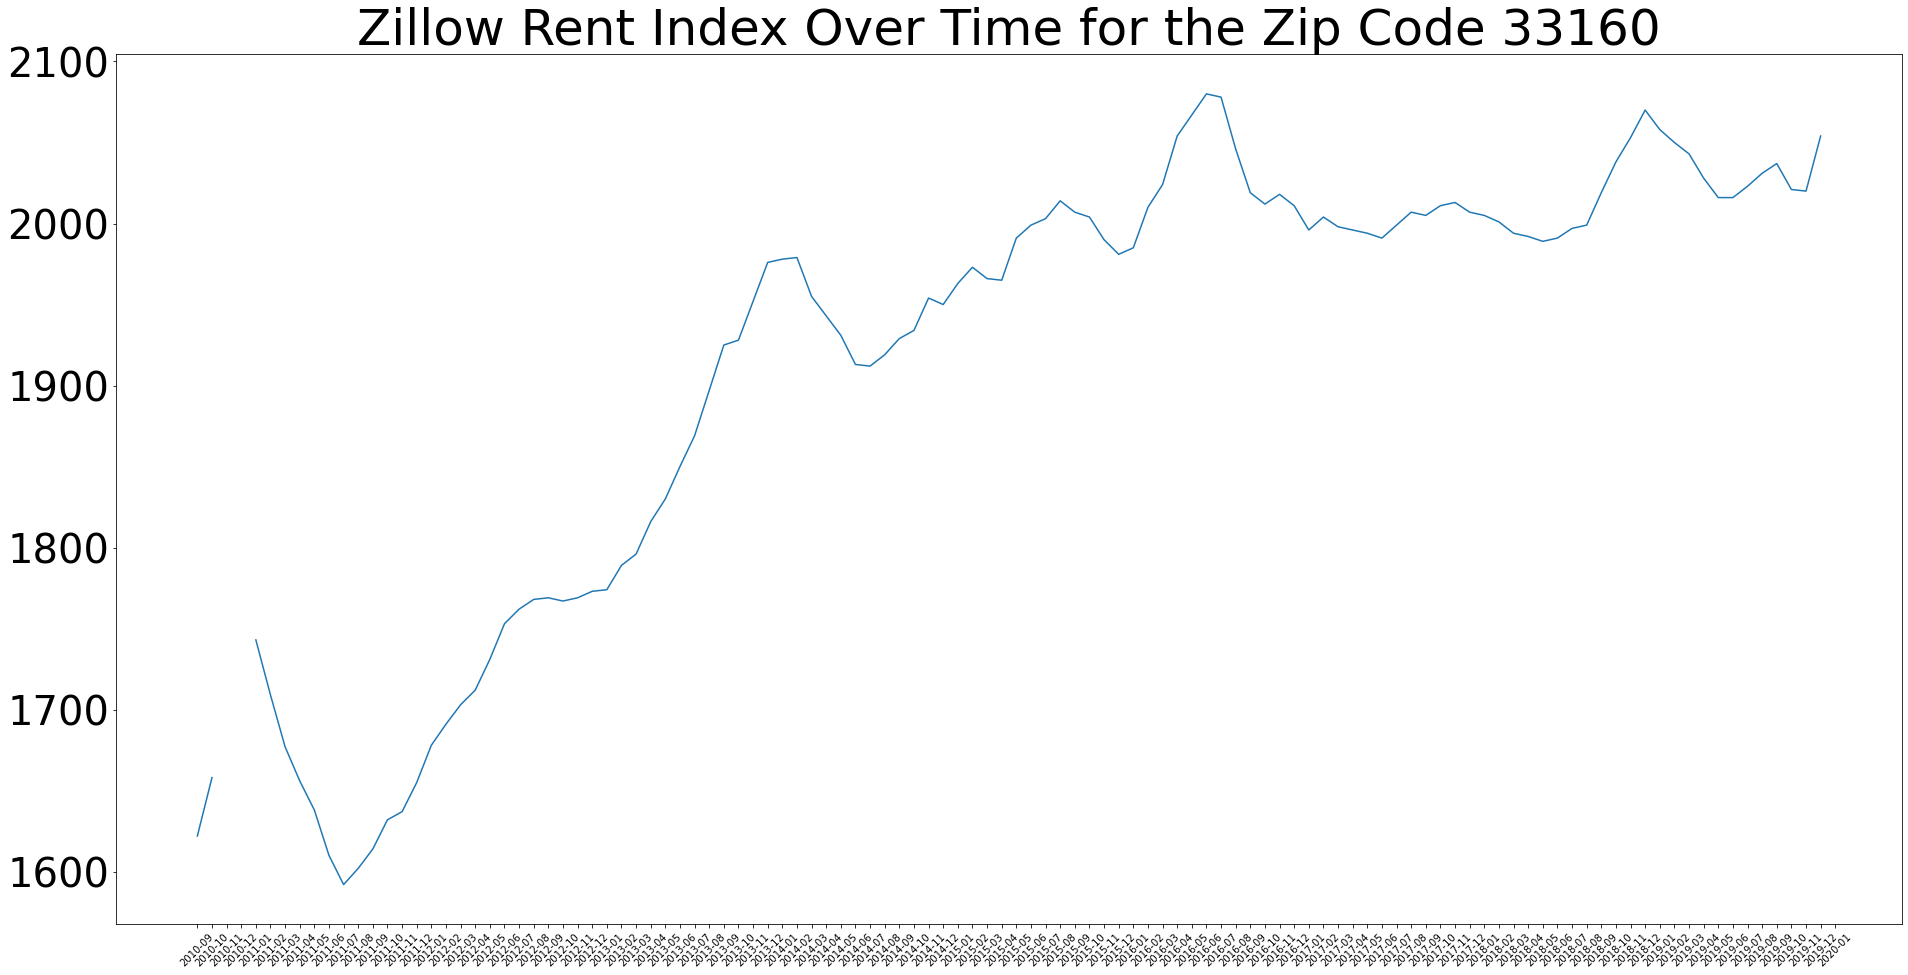

In [157]:
plt.figure(figsize = (32, 16))
plt.plot(zri_by_fl_zip.index, zri_by_fl_zip["33160"])
plt.xticks(rotation=45)
plt.yticks(size=40)
plt.title("Zillow Rent Index Over Time for the Zip Code 33160", size=50)
plt.show()

In [163]:
df_metro_fl.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
71,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,72,1622.0,1658.0,NaN,...,2028.0,2016.0,2016.0,2023.0,2031.0,2037.0,2021.0,2020.0,2054.0,NaN
72,73221,34787,Winter Garden,FL,Orlando-Kissimmee-Sanford,Orange County,73,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1459.0,1473.0,1487.0,1443.0,1433.0
85,72363,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,86,1106.0,1120.0,1133.0,...,1614.0,1617.0,1616.0,1618.0,1618.0,1622.0,1610.0,1629.0,1636.0,1611.0
90,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,91,1388.0,1423.0,1449.0,...,1956.0,1958.0,1976.0,1993.0,2001.0,1992.0,1996.0,1939.0,1958.0,NaN
127,72362,33024,Pembroke Pines,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,128,NaN,NaN,NaN,...,1537.0,1534.0,1537.0,1537.0,1537.0,1537.0,1527.0,1525.0,1544.0,1527.0


In [165]:
df_miami=df_metro_fl[df_metro_fl["Metro"]=="Miami-Fort Lauderdale-West Palm Beach"]

In [170]:
df_miami

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
71,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,72,1622.0,1658.0,NaN,...,2028.0,2016.0,2016.0,2023.0,2031.0,2037.0,2021.0,2020.0,2054.0,NaN
85,72363,33025,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,86,1106.0,1120.0,1133.0,...,1614.0,1617.0,1616.0,1618.0,1618.0,1622.0,1610.0,1629.0,1636.0,1611.0
90,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,91,1388.0,1423.0,1449.0,...,1956.0,1958.0,1976.0,1993.0,2001.0,1992.0,1996.0,1939.0,1958.0,NaN
127,72362,33024,Pembroke Pines,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,128,NaN,NaN,NaN,...,1537.0,1534.0,1537.0,1537.0,1537.0,1537.0,1527.0,1525.0,1544.0,1527.0
160,72347,33009,Hallandale,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,161,1173.0,1190.0,1203.0,...,1660.0,1659.0,1657.0,1648.0,1637.0,1630.0,1627.0,1632.0,1613.0,1605.0
181,72488,33186,The Crossings,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,182,1152.0,1156.0,1160.0,...,1573.0,1577.0,1594.0,1607.0,1616.0,1614.0,1623.0,1625.0,1624.0,1624.0
194,72393,33064,Pompano Beach,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,195,NaN,NaN,NaN,...,1466.0,1462.0,1463.0,1467.0,1479.0,1488.0,1523.0,1499.0,1506.0,NaN
196,72365,33027,Miramar,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,197,NaN,NaN,NaN,...,NaN,NaN,NaN,1774.0,1780.0,1784.0,1796.0,1790.0,1823.0,1816.0
198,72530,33311,Fort Lauderdale,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,199,993.0,1018.0,1019.0,...,1385.0,1393.0,1420.0,1436.0,1444.0,1449.0,1448.0,1444.0,1419.0,1397.0
222,72532,33313,Lauderhill,FL,Miami-Fort Lauderdale-West Palm Beach,Broward County,223,NaN,NaN,NaN,...,1443.0,1451.0,1458.0,1464.0,1461.0,1456.0,1459.0,1468.0,1477.0,1451.0


In [199]:
df_miami_mean=df_miami.groupby("Metro").mean().iloc[: , 3:]
df_miami_mean=df_miami_mean.T

In [204]:
df_miami_mean.columns=["Mean_Rent"]
df_miami_mean.head()

,Mean_Rent
2010-09,1326.064516
2010-10,1368.440000
2010-11,1334.560000
2010-12,1360.321429
2011-01,1386.516129


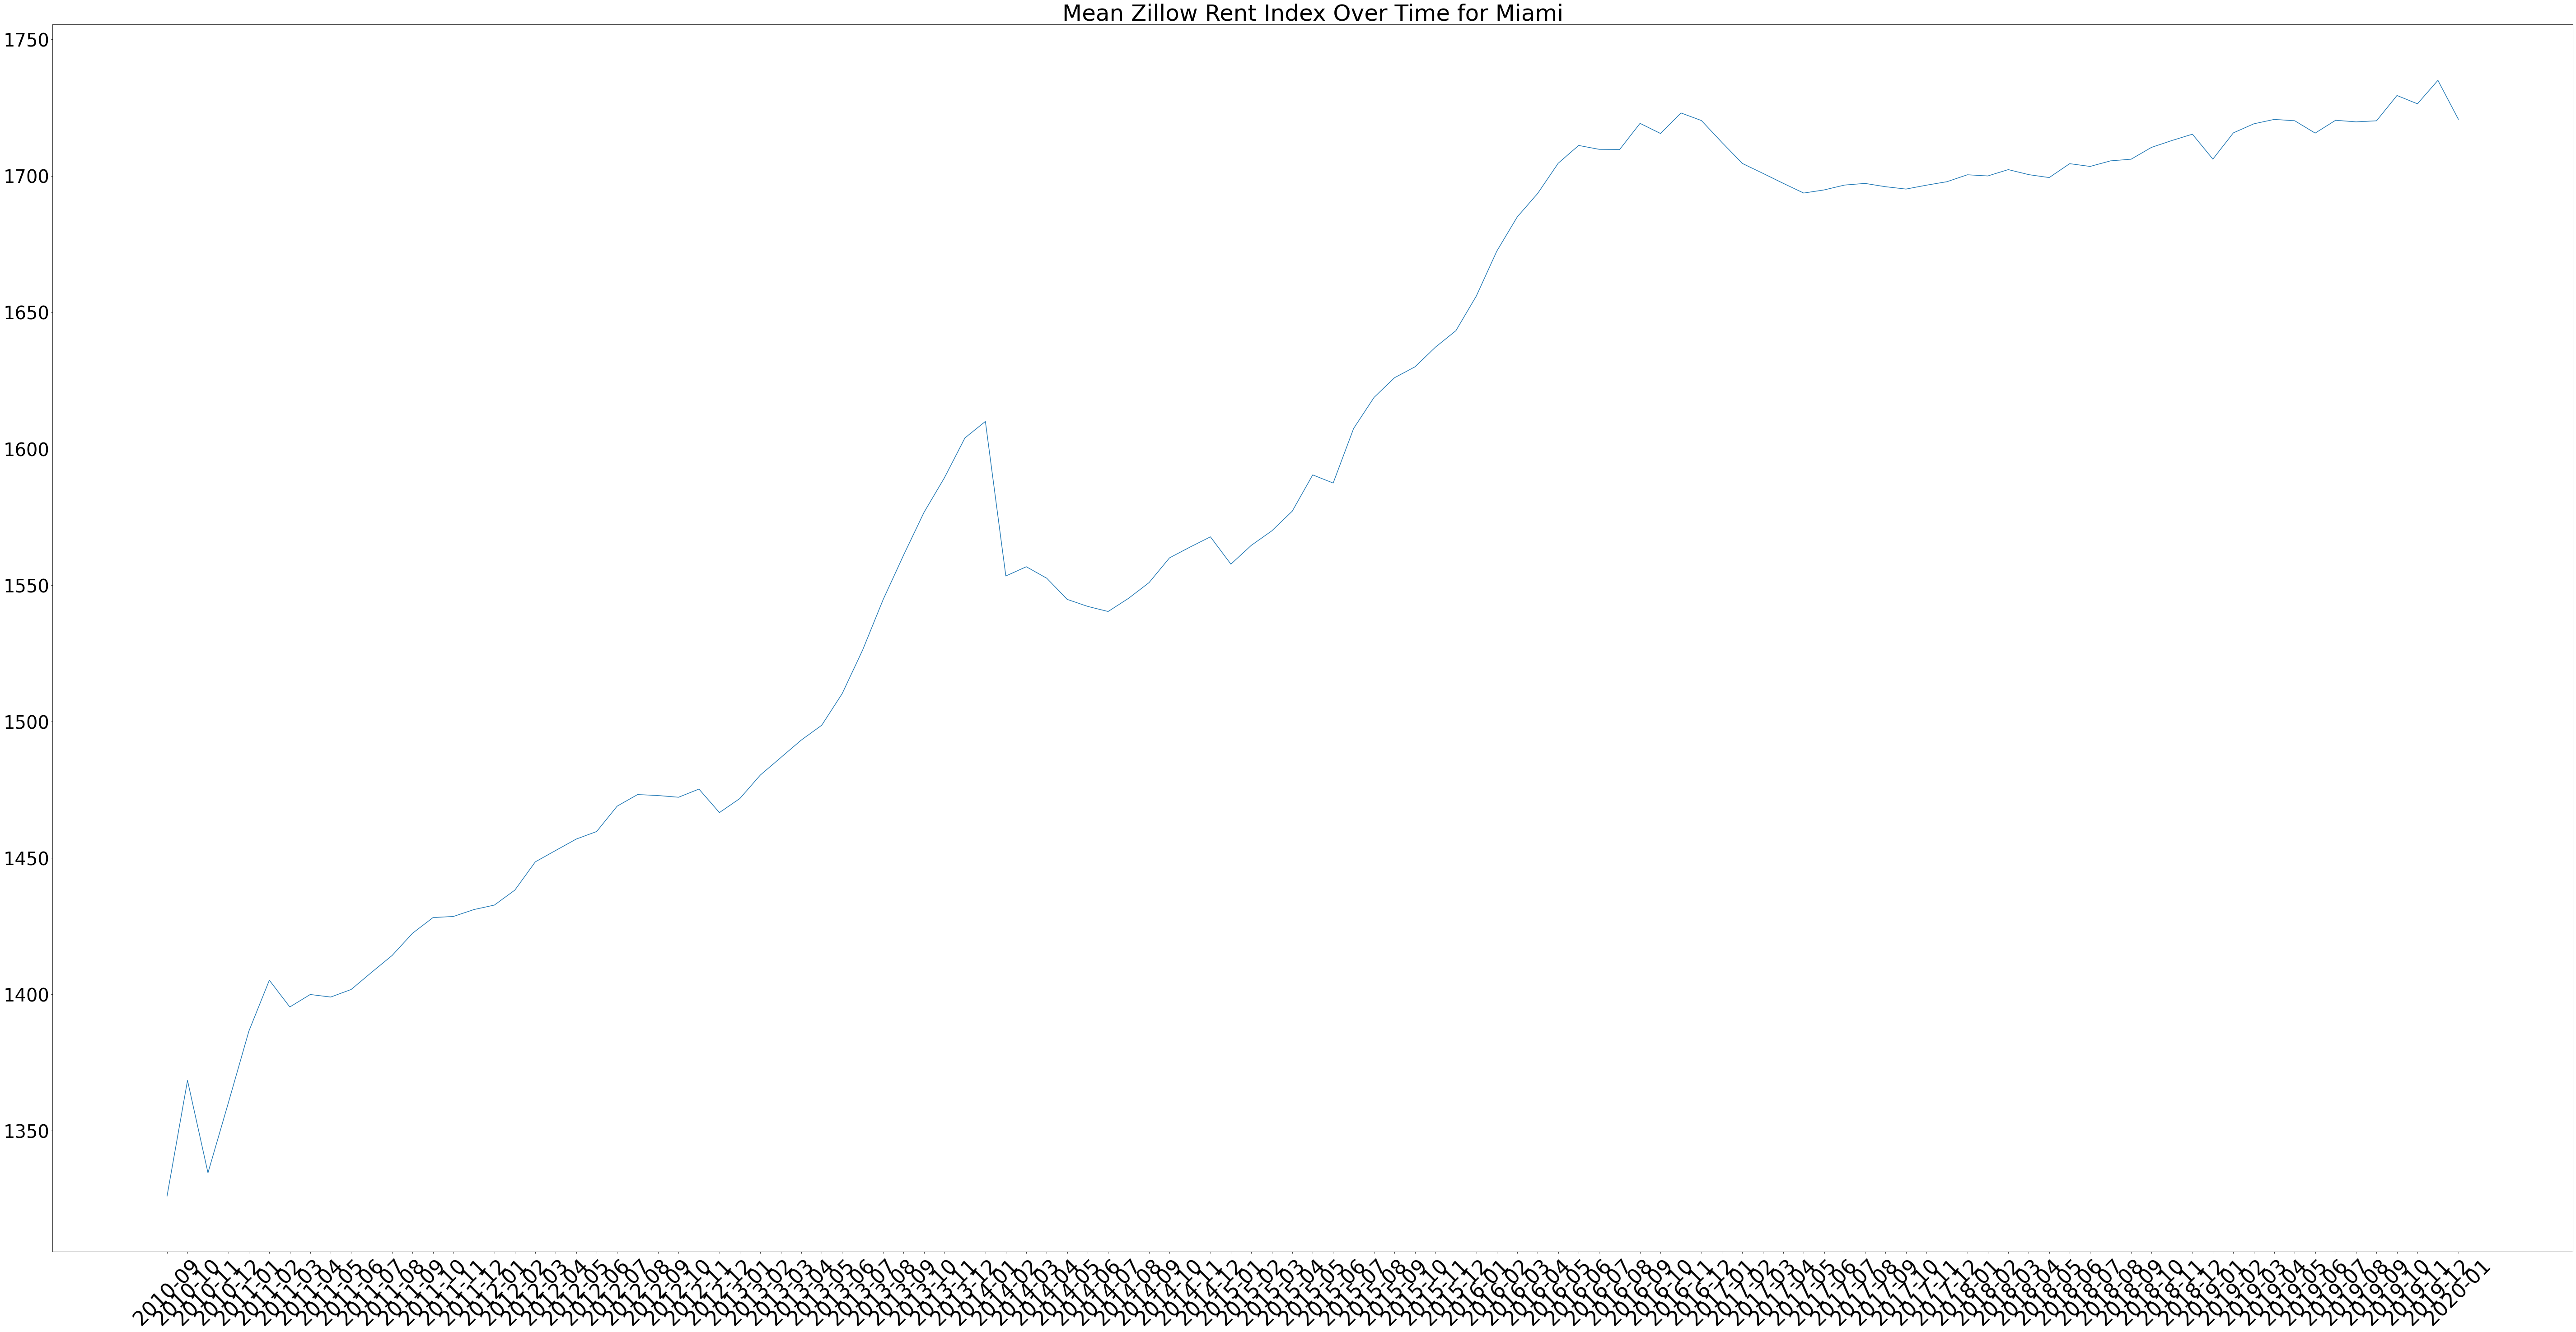

In [217]:
plt.figure(figsize = (100, 50))
plt.plot(df_miami_mean.index, df_miami_mean["Mean_Rent"])
plt.xticks(rotation=45, size=45)
plt.yticks(size=40)
plt.title("Mean Zillow Rent Index Over Time for Miami", size=50)

fig, ax = plt.show()


In [191]:
df_miami.groupby("Metro").max().iloc[: , 6:]

,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
Metro,,,,,,,,,,,,,,,,,,,,,
Miami-Fort Lauderdale-West Palm Beach,1622.0,1658.0,1678.0,1717.0,1743.0,1711.0,1706.0,1735.0,1748.0,1749.0,...,2265.0,2282.0,2287.0,2291.0,2290.0,2283.0,2286.0,2259.0,2392.0,2373.0


In [194]:
df_miami.groupby("Metro").min().iloc[: , 6:]

,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
Metro,,,,,,,,,,,,,,,,,,,,,
Miami-Fort Lauderdale-West Palm Beach,957.0,1018.0,1009.0,1014.0,1029.0,1058.0,1077.0,1092.0,1103.0,1112.0,...,1326.0,1330.0,1349.0,1359.0,1364.0,1369.0,1385.0,1351.0,1372.0,1361.0


### Percentage of Missing Values in Each Month's Index

In [124]:
df_metro_fl.isnull().sum(axis=1)/113*100
#120 total number of columns minus 7 columns that are not "months"

71       2.654867
72      95.575221
85       0.000000
90       0.884956
127     36.283186
153      0.000000
158     96.460177
160      0.000000
178      0.000000
181      0.000000
194     47.787611
196     41.592920
198      0.000000
222     36.283186
229     82.300885
230     37.168142
266     24.778761
283     40.707965
287     67.256637
294      0.000000
296     36.283186
314     67.256637
315     93.805310
324      0.000000
329     43.362832
336     38.938053
343     37.168142
364     37.168142
375      0.000000
380      0.000000
385      0.000000
388     94.690265
390      2.654867
398     39.823009
399      0.000000
408      0.000000
410     36.283186
453      0.000000
462     68.141593
478      0.884956
508      0.000000
514     38.053097
522      0.884956
523     96.460177
534     37.168142
543      0.000000
544     38.053097
548      0.884956
555      5.309735
573      1.769912
589     24.778761
625     60.176991
640     98.230088
646      1.769912
660      0.884956
661     38